In [3]:
from typing import Optional

import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as patches
from matplotlib import cm
import pickle
import seaborn as sns
import pandas as pd

sys.path.append("../")
from epuc.datasets import (
    PolynomialDataset,
    sine_fct_prediction,
    BernoulliSineDataset
)
from epuc.configs import data_config

#from experiments.run_experiments import create_data
from epuc.datasets import create_evaluation_data

plt.style.use("seaborn-v0_8-bright")
import json 
import os

In [403]:
# use viridis as colormap
plt.rcParams['image.cmap'] = 'viridis'
# latex as text renderer
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}
plt.rcParams.update(tex_fonts)
viridis = matplotlib.colormaps['viridis']
print(viridis)

### Plot results of second order optimisation experiments

In [5]:
# path to experiments with different number of samples
CLASS_DICT_100 = "../data/classification/new_exp_100_samples/"
CLASS_DICT_500 = "../data/classification/new_exp_500_samples/"
CLASS_DICT_1000 = "../data/classification/new_exp_1000_samples/"

REG_DICT_100 = "../data/regression/regression_100/"
REG_DICT_500 = "../data/regression/regression_500/"
REG_DICT_1000 = "../data/regression/regression_1000/"

# path to experiments wiith longer runtimes to track divergence of parameters
CLASS_DICT_LONG ="../data/classification/long_run/"
REG_DICT_LONG = "../data/regression/regression_longer/"

In [6]:
def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim


In [6]:
figsize = set_size(345)

### 1. Classification

In [10]:
# fucntion to load the data for each experiment
def load_results(path):
    with open(path, 'rb') as f:
        results = pickle.load(f)
    return results

In [11]:
keys = ["Bernoulli", "Beta_outer", "Beta_outer_reg", "Beta_inner","Beta_inner_reg"]
# load results for different sample sizes

results_bernoulli_100 = load_results(os.path.join(CLASS_DICT_100, "results_Bernoulli.pkl"))
results_beta_outer_100 = load_results(os.path.join(CLASS_DICT_100, "results_Beta_outer.pkl"))
results_beta_inner_100 = load_results(os.path.join(CLASS_DICT_100, "results_Beta_inner.pkl"))
results_beta_outer_reg_100 = load_results(os.path.join(CLASS_DICT_100, "results_Beta_outer_reg.pkl"))
results_beta_inner_reg_100 = load_results(os.path.join(CLASS_DICT_100, "results_Beta_inner_reg.pkl"))
results_dict_100 = dict(zip(keys, [results_bernoulli_100, results_beta_outer_100, results_beta_outer_reg_100, results_beta_inner_100, results_beta_inner_reg_100]))

results_bernoulli_500 = load_results(os.path.join(CLASS_DICT_500, "results_Bernoulli.pkl"))
results_beta_outer_500 = load_results(os.path.join(CLASS_DICT_500, "results_Beta_outer.pkl"))
results_beta_inner_500 = load_results(os.path.join(CLASS_DICT_500, "results_Beta_inner.pkl"))
results_beta_outer_reg_500 = load_results(os.path.join(CLASS_DICT_500, "results_Beta_outer_reg.pkl"))
results_beta_inner_reg_500 = load_results(os.path.join(CLASS_DICT_500, "results_Beta_inner_reg.pkl"))
results_dict_500 = dict(zip(keys, [results_bernoulli_500, results_beta_outer_500, results_beta_outer_reg_500, results_beta_inner_500, results_beta_inner_reg_500]))

results_bernoulli_1000 = load_results(os.path.join(CLASS_DICT_1000, "results_Bernoulli.pkl"))
results_beta_outer_1000 = load_results(os.path.join(CLASS_DICT_1000, "results_Beta_outer.pkl"))
results_beta_inner_1000 = load_results(os.path.join(CLASS_DICT_1000, "results_Beta_inner.pkl"))
results_beta_outer_reg_1000 = load_results(os.path.join(CLASS_DICT_1000, "results_Beta_outer_reg.pkl"))
results_beta_inner_reg_1000 = load_results(os.path.join(CLASS_DICT_1000, "results_Beta_inner_reg.pkl"))
results_dict_1000 = dict(zip(keys, [results_bernoulli_1000, results_beta_outer_1000, results_beta_outer_reg_1000, results_beta_inner_1000, results_beta_inner_reg_1000]))

In [12]:
results_dicts = [results_dict_100, results_dict_500, results_dict_1000]
n_samples_list = [100, 500, 1000]
titles_rows = [r"$N=100$", r"$N=500$", r"$N=1000$"]
titles_cols = [
        "Reference Distribution \n",
        "Outer Expectation Minimization \n" + r"$\lambda=0.0$",
        "Outer Expectation Minimization \n" + r"$\lambda=0.01$",
        "Inner Expectation Minimization \n" + r"$\lambda=0.0$",
        "Inner Expectation Minimization \n" + r"$\lambda=0.01$",
    ]

In [439]:
# sns.set_style("whitegrid")
# fucntion for plotting all figures in one plot
def plot_beta_experiment(
    list_results: list,
    dataset,
    list_train_points: list,
    list_row_titles: list,
    list_col_titles: list,
    figsize: tuple,
    save_path: str,
    file_name: str,
    **kwargs_data,
):
    fig, ax = plt.subplots(
        len(list_results),
        len(list_results[0]),
        figsize=figsize,
        sharex=True,
        sharey=True,
    )

    # plt.suptitle("Classification results", fontsize=25)
    # adjust spacing between subplots
    fig.subplots_adjust(hspace=0.1, wspace=0.1)
    # set ticks fontsize for each subplot
    for i in range(len(list_results)):
        for j in range(len(list_results[0])):
            ax[i, j].tick_params(axis="both", which="major", labelsize=22)
    for i, title in enumerate(list_row_titles):
        # bold titles
        ax[i, 0].set_ylabel(title, fontsize=22)
    for i, title in enumerate(list_col_titles):
        # bold titles
        ax[0, i].set_title(title, fontsize=22)
    for i in range(3):
        for j in range(len(list_results[0])):
            pass
            # ax[i, j].set_facecolor("white")
    # training data
    list_x_inst = []
    list_y_targets = []
    for n_samples in list_train_points:
        dataset_train = dataset(n_samples, **kwargs_data)
        x_inst = dataset_train.x_inst
        y_target = dataset_train.y_labels
        list_x_inst.append(x_inst)
        list_y_targets.append(y_target)

    for i, ens_type in enumerate(list_results[0].keys()):
        for j, results_dict in enumerate(list_results):
            x_eval = np.linspace(0, 1, 1000)
            y_eval = sine_fct_prediction(x_eval)

            # create dataframe with instance values and targets
            # plot vertical lines for where training data is
            ax[j, i].axvline(
                list_x_inst[j].min(), linestyle="--", color="black", alpha=0.5
            )
            ax[j, i].axvline(
                list_x_inst[j].max(), linestyle="--", color="black", alpha=0.5
            )
            # plot ground truth

            ax[len(list_results) - 1, i].set_xlabel("x", fontsize=25)
            # ax[j, i].set_ylabel(r"$\theta$", fontsize=20)

            # scatter training data
            # ax[j, i].scatter(
            #     list_x_inst[j],
            #     list_y_targets[j],
            #     label=r"$y_i$",
            #     marker="x",
            #     color="black",
            #     s=15,
            #     alpha=0.5,
            # )
            ax[j, i].axvspan(x_inst.max(), x_eval.max(), alpha=0.1, color="gray")
            # plot predictions for theta ------------------------------------
            if ens_type == "Bernoulli":
                ax[j, i].scatter(
                list_x_inst[j],
                list_y_targets[j],
                label=r"$y_i$",
                marker="x",
                color="black",
                s=15,
                alpha=0.5,
            )
                ax[j, i].plot(
                    x_eval,
                    results_dict[ens_type]["mean_probs"],
                    label=r"$\widehat{\theta}$",
                )
                ax[j, i].plot(
                    x_eval,
                    results_dict[ens_type]["pred_probs"][:, :, 0],
                    alpha=0.1,
                    color="black",
                )
                ax[j, i].fill_between(
                    x_eval,
                    results_dict[ens_type]["lower_p"],
                    results_dict[ens_type]["upper_p"],
                    alpha=0.4,
                    label="$95\% CI$",
                    color="black"
                )
            else:
                # plot predictions for mu ------------------------------------
                #   ax[j, i].plot(
                #       x_eval,
                #       results_dict[ens_type]["mean_pred_p"],
                #       label="mean prediction",
                ##       color="blue",
                #   )
                mean_pred_p = results_dict[ens_type]["pred_alphas"].mean(axis=1) / (
                    results_dict[ens_type]["pred_alphas"].mean(axis=1)
                    + results_dict[ens_type]["pred_betas"].mean(axis=1)
                )
                ax[j, i].plot(
                    x_eval, mean_pred_p
                )
                ax[j, i].fill_between(
                    x_eval,
                    results_dict[ens_type]["lower_p"],
                    results_dict[ens_type]["upper_p"],
                    alpha=0.5,
                    label="$95\% CI$",
                )
            if j == 0 and (i == 0 or i == 1):
                ax[j, i].legend(fontsize=18)
            ax[j, i].plot(x_eval, y_eval, label=r"$\theta$", color="green")
    # ------------------------------------
    # add
    for i in range(3):  # 3 rows
        # Create a rectangle patch with the same size as the subplot
        rect = patches.Rectangle(
            (0, 0), 1, 1, transform=ax[i, 0].transAxes, color="gray", alpha=0.2
        )

        # Add the rectangle patch to the subplot
        ax[i, 0].add_patch(rect)

    plt.tick_params(axis="both", which="major", labelsize=22)

    # save plot in results folder
    # make sure folder exists
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    plt.savefig(
        save_path + file_name,
        bbox_inches="tight",
        dpi=350
    )
    return fig, ax

In [412]:
# function for plotting just one row
def plot_conf_bounds_beta(
    x_train: np.ndarray,
    y_targets: np.ndarray,
    x_eval,
    y_eval,
    results_dict: dict,
    figsize: tuple,
    save_path: str,
    file_name: str,
    title: Optional[str] = None,
    **kwargs_data
):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    # plt.xticks(fontsize= 10)
    ax.tick_params(axis="both", which="major", labelsize=12)
    ax.tick_params(axis="both", which="major", labelsize=20)

    # create dataframe with instance values and targets
    # plot vertical lines for where training data is
    ax.axvline(x_train.min(), linestyle="--", color="black", alpha=0.5)
    ax.axvline(x_train.max(), linestyle="--", color="black", alpha=0.5)
    # plot ground truth
    ax.plot(x_eval, y_eval, label=r"$\theta$")
    ax.set_xlabel("x", fontsize=20)
    # ax[j, i].set_ylabel(r"$\theta$", fontsize=20)

    # scatter training data
    ax.scatter(
        x_train,
        y_targets,
        label=r"$y_i$",
        marker="x",
        color="black",
        s=15,
        alpha=0.5,
    )
    ax.axvspan(x_train.max(), x_eval.max(), alpha=0.1)
    # plot predictions for theta ------------------------------------
    mean_pred_p = results_dict["pred_alphas"].mean(axis=1) / (
        results_dict["pred_alphas"].mean(axis=1)
        + results_dict["pred_betas"].mean(axis=1)
    )
    ax.plot(
        x_eval,
        mean_pred_p,
        label=r"$\widehat{\theta}$",
    )
    ax.fill_between(
        x_eval,
        results_dict["lower_p"],
        results_dict["upper_p"],
        alpha=0.5,
        label="95% CI",
    )

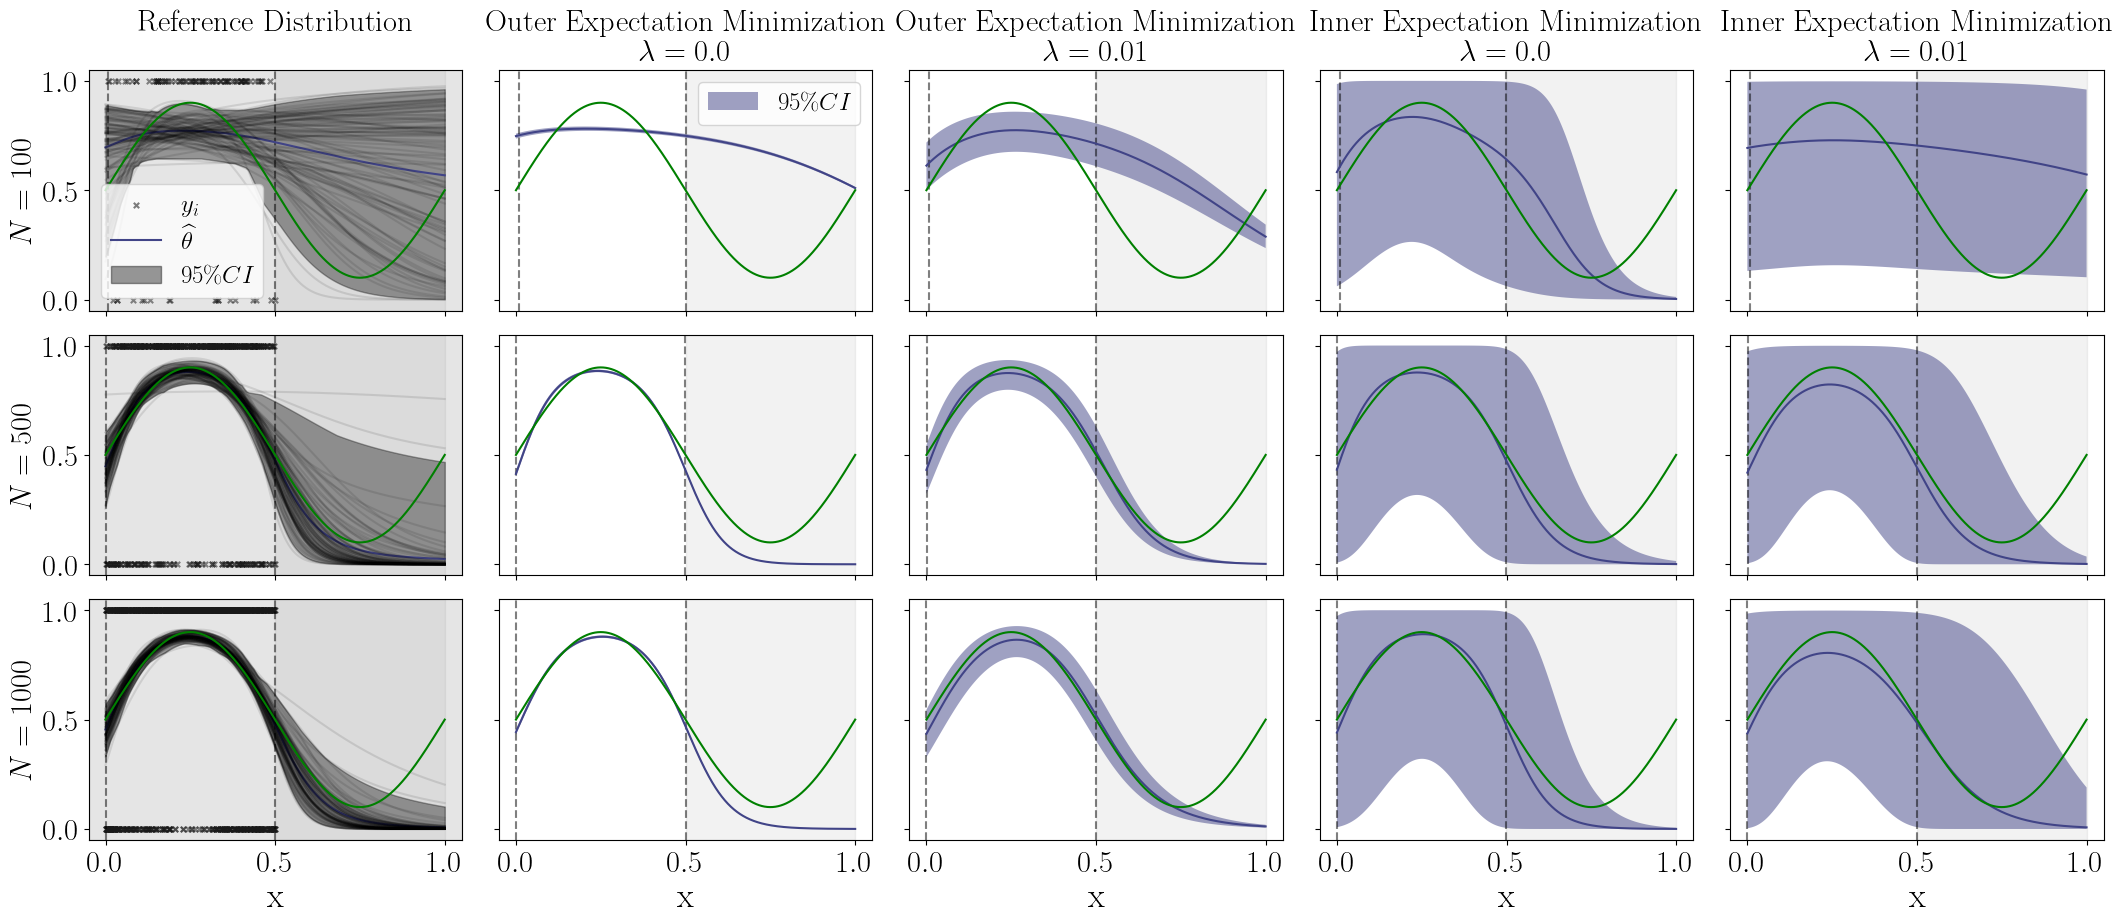

In [440]:
fig, ax = plot_beta_experiment(results_dicts,BernoulliSineDataset, [100, 500, 1000], titles_rows, titles_cols, (26, 10), "./figures/classification/", "conf_classification_viridis.png")

### parameter analysis:

In [441]:
results_longer_bernoulli = load_results(os.path.join(CLASS_DICT_LONG, "results_Bernoulli.pkl"))
results_longer_beta_outer = load_results(os.path.join(CLASS_DICT_LONG, "results_Beta_outer.pkl"))
results_longer_beta_outer_reg = load_results(os.path.join(CLASS_DICT_LONG, "results_Beta_outer_reg.pkl"))
results_longer_beta_inner = load_results(os.path.join(CLASS_DICT_LONG, "results_Beta_inner.pkl"))
results_longer_beta_inner_reg = load_results(os.path.join(CLASS_DICT_LONG, "results_Beta_inner_reg.pkl"))

results_longer = [results_longer_beta_outer, results_longer_beta_outer_reg, results_longer_beta_inner, results_longer_beta_inner_reg]

In [442]:
n_epochs = results_longer_bernoulli["conf_bounds"]["param_0"]["mean"].shape[0]

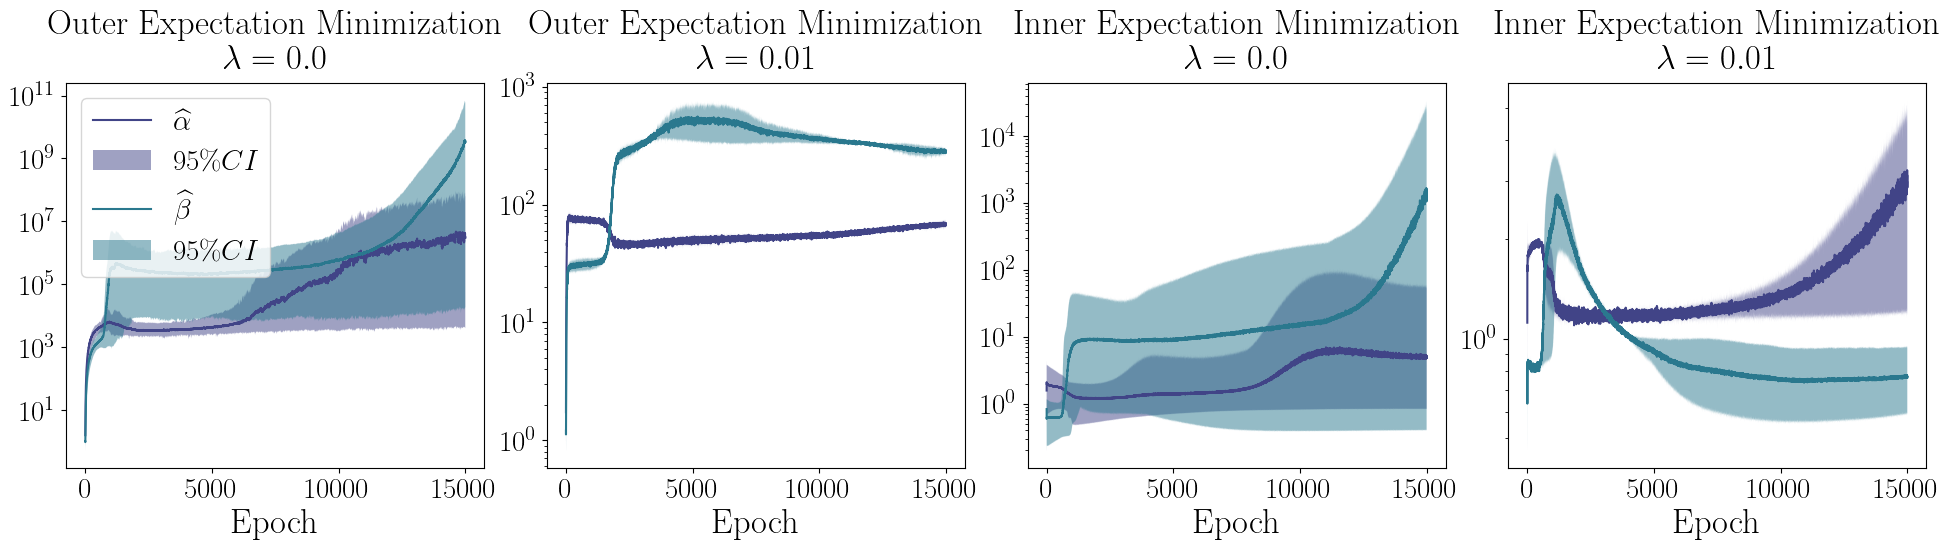

In [461]:
# change size of ticks
plt.rcParams["font.size"] = 28
# cahnge size of tick x and y labels

fig, ax, = plt.subplots(1, len(results_longer), figsize=(24, 5))
fig.subplots_adjust(hspace=0.1, wspace=0.15)
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
col_titles = [
    "Outer Expectation Minimization \n" + "$\lambda=0.0$",
    "Outer Expectation Minimization \n" + "$\lambda=0.01$",
    "Inner Expectation Minimization \n" + "$\lambda=0.0$",
    "Inner Expectation Minimization \n" + "$\lambda=0.01$",
]
for ax_sub, col in zip(ax, col_titles):
    ax_sub.set_title(col, fontsize=25, pad=10)

for i in range(len(results_longer)):
    ax[i].set_xlabel("Epoch", fontsize=25)
# log scale y axis
# ax[0].set_yscale("log")
for i in range(len(results_longer)):
    ax[i].plot(
        results_longer[i]["conf_bounds"]["param_0"]["mean"], label=r"$\widehat{\alpha}$"
    )
    ax[i].fill_between(
        np.arange(0, n_epochs),
        results_longer[i]["conf_bounds"]["param_0"]["lower"],
        results_longer[i]["conf_bounds"]["param_0"]["upper"],
        alpha=0.5,
        label="$95\% CI$",
    )
    ax[i].plot(
        results_longer[i]["conf_bounds"]["param_1"]["mean"], label=r"$\widehat{\beta}$"
    )
    ax[i].fill_between(
        np.arange(0, n_epochs),
        results_longer[i]["conf_bounds"]["param_1"]["lower"],
        results_longer[i]["conf_bounds"]["param_1"]["upper"],
        alpha=0.5,
        label="$95\% CI$",
    )

    # log scale y axis
    ax[i].set_yscale("log")
    # set ticks
    ax[i].tick_params(axis="both", which="major", labelsize=21)
    ax[0].legend(fontsize=21, loc="upper left")
# save figure
if not os.path.exists("./figures/classification/"):
    os.makedirs("./figures/classification/")
#plt.tight_layout()
plt.savefig(
    "./figures/classification/parameter_analysis_class.png",
    bbox_inches="tight",
    dpi=400
)

# # save figure
# if not os.path.exists("./results/classification/figures"):
#     os.makedirs("./results/classification/figures")
# plt.savefig(
#     "./results/classification/figures/classification_parameter_analysis_test.pdf",
#     bbox_inches="tight",
# )

plot all subplots separately:

In [94]:
def plot_mean_bounds_beta(results_dict: dict, figsize: tuple, title: str, plot_legend: bool, save_path:str, figname:str):
    
    fig, ax, = plt.subplots(1, 1, figsize=(figsize))

    #ax.set_title(title, fontsize=28, pad=15)
    ax.tick_params(axis="both", which="major", labelsize=28)

    ax.set_xlabel("Epoch", fontsize=26)
    # log scale y axis
    ax.plot(
        results_dict["conf_bounds"]["param_0"]["mean"], label=r"$\widehat{\alpha}$"
    )
    ax.fill_between(
        np.arange(0, n_epochs),
        results_dict["conf_bounds"]["param_0"]["lower"],
        results_dict["conf_bounds"]["param_0"]["upper"],
        alpha=0.5,
        label="$95\% \, CI$",
    )
    ax.plot(
        results_dict["conf_bounds"]["param_1"]["mean"], label=r"$\widehat{\beta}$"
    )
    ax.fill_between(
        np.arange(0, n_epochs),
        results_dict["conf_bounds"]["param_1"]["lower"],
        results_dict["conf_bounds"]["param_1"]["upper"],
        alpha=0.5,
        label="$95\% \, CI$",
    )

    # log scale y axis
    ax.set_yscale("log")
    if plot_legend:
        ax.legend(fontsize=22)

    # save figure
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    plt.savefig(
        save_path + figname,
        bbox_inches="tight",
        dpi=350
    )


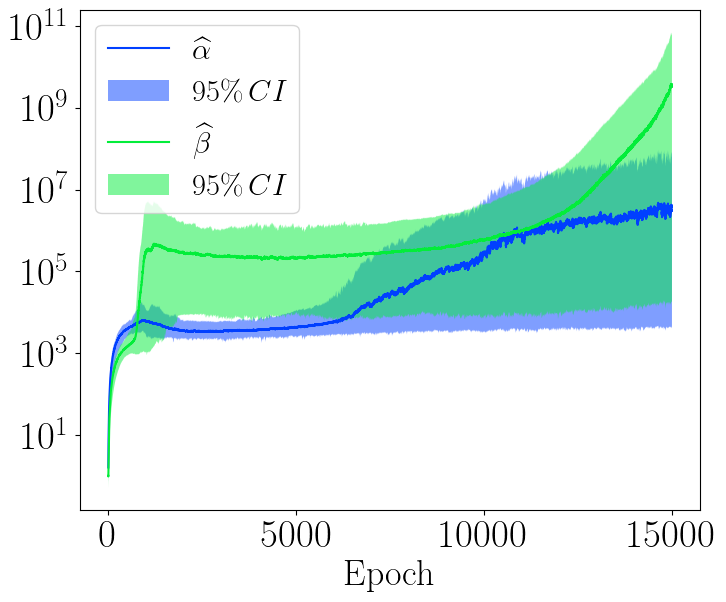

In [95]:
plot_mean_bounds_beta(results_longer_beta_outer, (8, 6.5), "Inner Expectation Minimization \n" + "$\lambda=0.01$", True, "./figures/classification/", "outer_0_no_title.png")

### 3. Regression Case

In [102]:
keys_reg = ["Normal", "NIG_outer", "NIG_outer_reg", "NIG_inner", "NIG_inner_reg"]

In [103]:
# load data
results_normal_100 = load_results(os.path.join(REG_DICT_100, "results_Normal.pkl"))
results_normal_500 = load_results(os.path.join(REG_DICT_500, "results_Normal.pkl"))
results_normal_1000 = load_results(os.path.join(REG_DICT_1000, "results_Normal.pkl"))

results_nig_outer_100 = load_results(os.path.join(REG_DICT_100, "results_NIG_outer.pkl"))
results_nig_outer_500 = load_results(os.path.join(REG_DICT_500, "results_NIG_outer.pkl"))
results_nig_outer_1000 = load_results(os.path.join(REG_DICT_1000, "results_NIG_outer.pkl"))

results_nig_outer_reg_100 = load_results(os.path.join(REG_DICT_100, "results_NIG_outer_reg.pkl"))
results_nig_outer_reg_500 = load_results(os.path.join(REG_DICT_500, "results_NIG_outer_reg.pkl"))
results_nig_outer_reg_1000 = load_results(os.path.join(REG_DICT_1000, "results_NIG_outer_reg.pkl"))

results_nig_inner_100 = load_results(os.path.join(REG_DICT_100, "results_NIG_inner.pkl"))
results_nig_inner_500 = load_results(os.path.join(REG_DICT_500, "results_NIG_inner.pkl"))
results_nig_inner_1000 = load_results(os.path.join(REG_DICT_1000, "results_NIG_inner.pkl"))

results_nig_inner_reg_100 = load_results(os.path.join(REG_DICT_100, "results_NIG_inner_reg.pkl"))
results_nig_inner_reg_500 = load_results(os.path.join(REG_DICT_500, "results_NIG_inner_reg.pkl"))
results_nig_inner_reg_1000 = load_results(os.path.join(REG_DICT_1000, "results_NIG_inner_reg.pkl"))

In [104]:
results_dict_reg_100 = dict(
    zip(
        keys_reg,
        [
            results_normal_100,
            results_nig_outer_100,
            results_nig_outer_reg_100,
            results_nig_inner_100,
            results_nig_inner_reg_100,
        ],
    )
)
results_dict_reg_500 = dict(
    zip(
        keys_reg,
        [
            results_normal_500,
            results_nig_outer_500,
            results_nig_outer_reg_500,
            results_nig_inner_500,
            results_nig_inner_reg_500,
        ],
    )
)
results_dict_reg_1000 = dict(
    zip(
        keys_reg,
        [
            results_normal_1000,
            results_nig_outer_1000,
            results_nig_outer_reg_1000,
            results_nig_inner_1000,
            results_nig_inner_reg_1000,
        ],
    )
)

list_results_reg = [results_dict_reg_100, results_dict_reg_500, results_dict_reg_1000]

In [468]:
col_titles = [
    "Reference Model \n",
    "Outer Exp. Min. \n" + r"$\lambda=0.0$",
    "Outer Exp. Min\n " + r"$\lambda=0.01$",
    "Inner Exp. Min. \n" + r"$\lambda=0.0$",
    "Inner Exp. Min. \n" + r"$\lambda=0.01$",
]
row_titles = ["$N=100$", "$N=500$", "$N=1000$"]
n_samples = [100, 500, 1000]
list_x_train = []
list_y_train = []
for n in n_samples:
    dataset, x_eval, y_eval, x_inst, y_targets = create_evaluation_data(
        data_config,
        problem_type="regression",
        data_type="polynomial",
        n_eval_points=1000,
    )
    dataset_train = dataset(n_samples=n)
    x_train = dataset_train.x_inst
    y_train = dataset_train.y_targets
    # append
    list_x_train.append(x_train)
    list_y_train.append(y_train)

In [474]:
eps_std = 3
plt.rcParams["font.size"] = 20

sns.set_palette("viridis", 4) 
def plot_regression_exp(list_results: list,
    x_train: np.ndarray,
    y_train: np.ndarray,
    x_eval: np.ndarray,
    y_eval: np.ndarray,
    list_col_titles: list,
    plot_tiles: bool,
    figsize: tuple,
    save_path: str,
    file_name: str,):

    fig, ax = plt.subplots(
        2 * len(list_results),
        len(list_results[0]),
        figsize=figsize, sharex=True,
         sharey='row'
    )
    # make x and y ticks larger
    # make column titles
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    if plot_tiles:
        for ax_sub, col in zip(ax[0], list_col_titles):
            ax_sub.set_title(col, fontsize=28, pad=10, weight="bold")

    for i in range(2 * len(list_results)):
        for j in range(len(list_results[0])):
            ax[i, j].axvline(x_train.min(), linestyle="--", color="black", alpha=0.5)
            ax[i, j].axvline(x_train.max(), linestyle="--", color="black", alpha=0.5)
            ax[i, j].axvspan(x_eval.min(), x_train.min(), alpha=0.2, color="gray")
            ax[i, j].axvspan(x_train.max(), x_eval.max(), alpha=0.2, color="gray")
            ax[1, j].set_xlabel("$x$", fontsize=28)
            # logarithmic scale for y axis
    for i, ens_type in enumerate(list_results[0].keys()):
        for j in range(len(list_results)):
            ax[2 * j + 1, i].axhline(
                eps_std**2, linestyle="--")
            ax[2*j + 1, i].set_yscale("log")
            ax[2 * j, i].plot(x_eval, y_eval,color="black", linestyle="--")
            # set y limits
            ax[2 * j, i].set_ylim(-150, 150)

            if ens_type == "Normal":
                ax[2 * j + 1, i].axhline(
                eps_std**2, linestyle="--", label=r"$\sigma^2$"
            )
                ax[2 * j, i].plot(x_eval, y_eval,color="black", label=r"$x^3$", linestyle="--")
                # plot mu if i is odd
                ax[2 * j, 0].plot(
                    x_eval,
                    list_results[j][ens_type]["mean_mus"],
                    label="$\widehat{\mu}$",
                )
                ax[2 * j, 0].plot(
                    x_eval,
                    list_results[j][ens_type]["pred_mus"],
                    alpha=0.1,
                    color="black",
                )
                ax[2 * j, 0].fill_between(
                    x_eval,
                    list_results[j][ens_type]["lower_mu"],
                    list_results[j][ens_type]["upper_mu"],
                    alpha=0.6,
                    label="$95 \%\, CI$",
                    color="gray",
                )
                # scatter data points
                ax[2 * j, 0].scatter(
                    x_train,
                    y_train,
                    label="$y_i$",
                    marker="x",
                    s=23,
                    color="red",
                    alpha=0.6,
                )
                if j == 0:
                    ax[2 * j, 0].legend(fontsize=22, frameon=True, loc="upper left",bbox_to_anchor=(-0.04, 1.05))
                # ------------------------------------
                # predictions for sigma2
                ax[2 * j + 1, 0].plot(
                    x_eval,
                    list_results[j][ens_type]["pred_sigmas2"],
                    alpha=0.1,
                    color="black",
                )
                ax[2 * j + 1, 0].plot(
                    x_eval,
                    list_results[j][ens_type]["mean_sigma2"],
                    label=r"$\widehat{\sigma^2}$",
                )
                ax[2 * j + 1, 0].fill_between(
                    x_eval,
                    list_results[j][ens_type]["lower_sigma"],
                    list_results[j][ens_type]["upper_sigma"],
                    alpha=0.6,
                    label="95\% \, CI",
                    color="gray",
                )
                if j == 0:
                    ax[2 * j + 1, 0].legend(fontsize=22, frameon=True)

            else:
                ax[2 * j, i].plot(
                    x_eval,
                    list_results[j][ens_type]["mean_pred_mu"]
                )
                ax[2 * j, i].fill_between(
                    x_eval,
                    list_results[j][ens_type]["lower_mu"],
                    list_results[j][ens_type]["upper_mu"],
                    alpha=0.5,
                    label="95\% CI",
                )
                # ------------------------------------
                # plot predictions for sigma ------------------------------------
                ax[2 * j + 1, i].plot(
                    x_eval,
                    list_results[j][ens_type]["mean_pred_sigma2"],
                )
                ax[2 * j + 1, i].fill_between(
                    x_eval,
                    list_results[j][ens_type]["lower_sigma"],
                    list_results[j][ens_type]["upper_sigma"],
                    alpha=0.5,
                    label="$95\% CI$",
                )
                if j == 0 and i == 1:
                    # no frame around legend
                    ax[2 * j + 1, i].legend(fontsize=22,frameon=True)

    for i in range(2 * len(list_results)):  # 3 rows
        # 3 rows
        # Create a rectangle patch with the same size as the subplot
        rect = patches.Rectangle(
            (0, 0), 1, 1, transform=ax[i, 0].transAxes, color="gray", alpha=0.2
        )

        # Add the rectangle patch to the subplot
        ax[i, 0].add_patch(rect)
    # for i, title in enumerate(list_row_titles[::-1]):
    #     fig.text(
    #         0.08,
    #         (1.5 * i + 1.5) / 6,
    #         title,
    #         fontsize=25,
    #         ha="center",
    #         va="center",
    #         rotation="vertical",
    #         weight="bold",  
    #     )
    ax[0, 0].set_ylabel("$\mu$", fontsize=30, weight="bold", rotation="horizontal", labelpad=8)
    ax[1, 0].set_ylabel("$\sigma^2$", fontsize=30, weight="bold", rotation="horizontal", labelpad=27)
    #plt.tight_layout()
    for i in range(2* len(list_results)):
        for j in range(len(list_results[0])):
            ax[i, j].tick_params(axis="both", which="major", labelsize=32,)
    # save plot in results folder
    # make sure folder exists
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    plt.savefig(
        save_path + file_name,
        bbox_inches="tight",
        dpi=400
    )

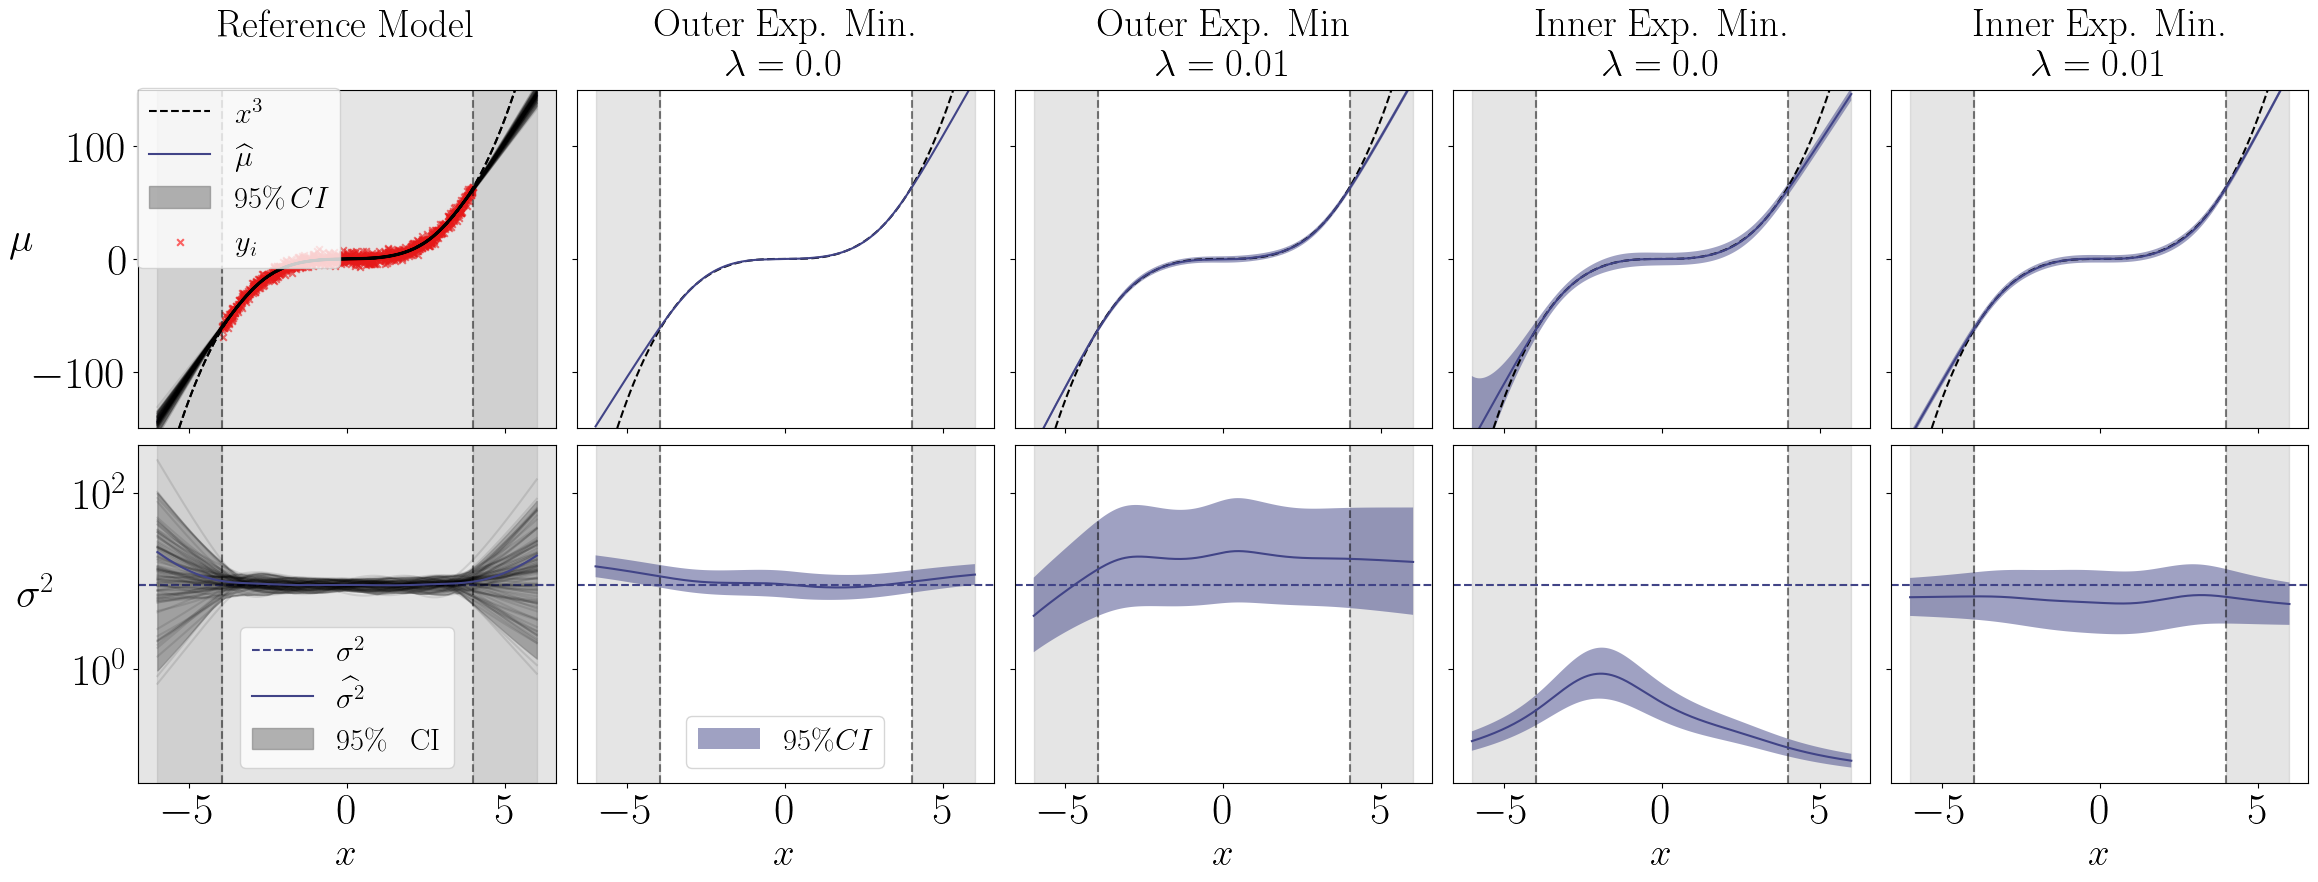

In [477]:
plot_regression_exp([list_results_reg[2]], list_x_train[2], list_y_train[2], x_eval, y_eval, col_titles,
                    True, (28, 9), "./figures/regression/", "conf_regression_500.png")

### parameter analysis

In [463]:
results_longer_normal= load_results(os.path.join(REG_DICT_LONG, "results_Normal.pkl"))
results_longer_nig_outer = load_results(os.path.join(REG_DICT_LONG, "results_NIG_outer.pkl"))
results_longer_nig_outer_reg = load_results(os.path.join(REG_DICT_LONG, "results_NIG_outer_reg.pkl"))
results_longer_nig_inner = load_results(os.path.join(REG_DICT_LONG, "results_NIG_inner.pkl"))
results_longer_nig_inner_reg = load_results(os.path.join(REG_DICT_LONG, "results_NIG_inner_reg.pkl"))

results_longer = [results_longer_nig_outer, results_longer_nig_outer_reg, results_longer_nig_inner, results_longer_nig_inner_reg]

In [464]:
results_longer_nig_outer["conf_bounds"]["param_1"]["mean"]

tensor([6.7983e-01, 7.9309e-01, 9.0996e-01,  ..., 4.5367e+03, 4.5373e+03,
        4.5379e+03])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


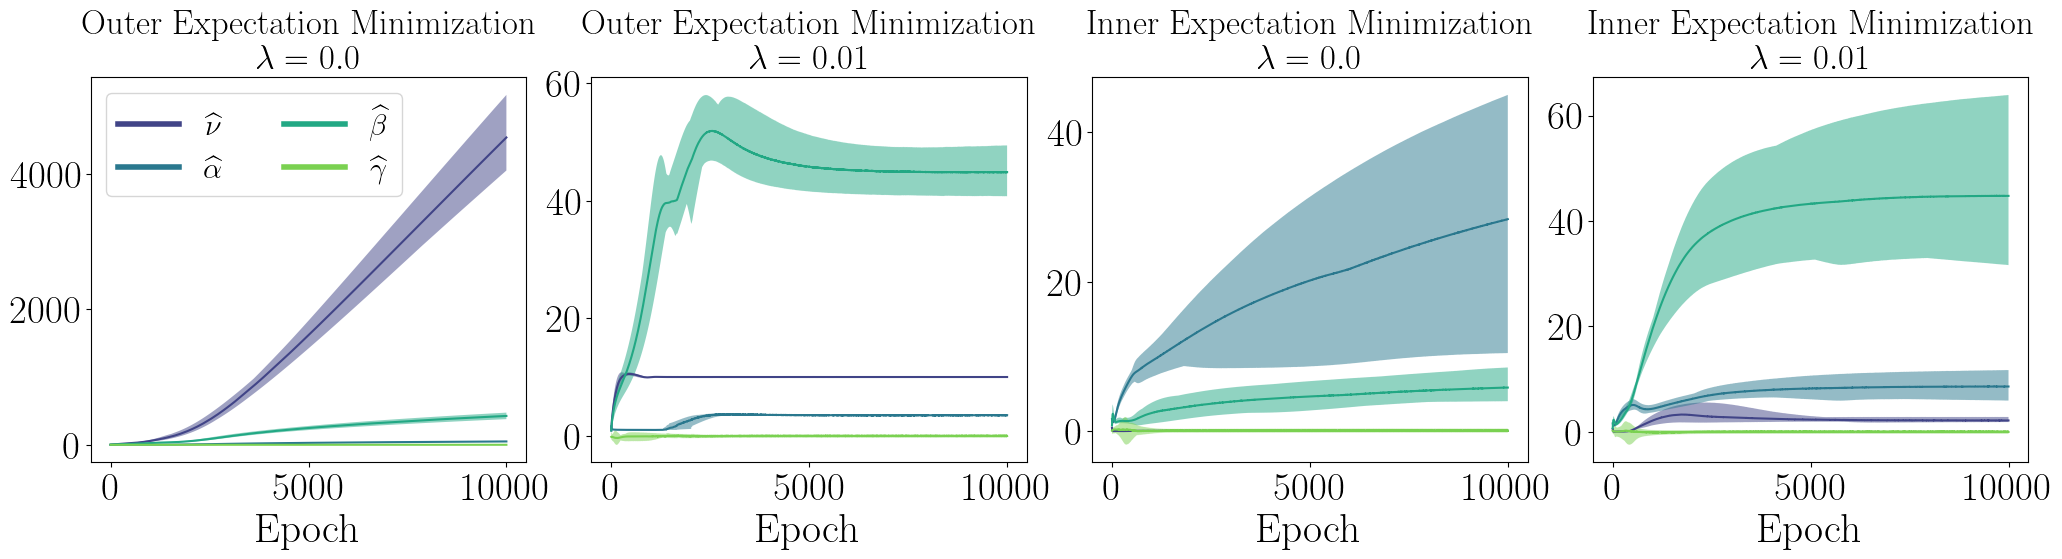

In [467]:
# use seaborn
sns.set_palette("viridis", 4) 

n_epochs = 10000
# change size of ticks
plt.rcParams["font.size"] = 28
# cahnge size of tick x and y labels

fig, ax = plt.subplots(1, len(results_longer), figsize=(25,5), sharex=True)
fig.subplots_adjust(hspace=0.1, wspace=0.15)
plt.rcParams["xtick.labelsize"] = 22
plt.rcParams["ytick.labelsize"] = 22
col_titles = [
    "Outer Expectation Minimization \n" + r"$\lambda=0.0$",
    "Outer Expectation Minimization \n" + r"$\lambda=0.01$",
    "Inner Expectation Minimization \n" + r"$\lambda=0.0$",
    "Inner Expectation Minimization \n" + r"$\lambda=0.01$",
]
# col titles
for i, title in enumerate(col_titles):
    ax[i].set_title(title, fontsize=25)

for i in range(len(results_longer)):
    ax[i].set_xlabel("Epoch", fontsize=30)
ax[0].legend(fontsize=25, loc="upper center", bbox_to_anchor=(0.5, 1.0))
for i in range(len(results_longer)):
    ax[i].tick_params(axis="both", which="major", labelsize=28,)
# log scale y axis
# ax[0].set_yscale("log")
for i in range(len(results_longer)):
    # ax[i].plot(
    #     results_longer[i]["conf_bounds"]["param_0"]["mean"], label=r"$\gamma$", 
    # )
    ax[i].plot(
        results_longer[i]["conf_bounds"]["param_1"]["mean"], label=r"$\widehat{\nu}$",
    )
    ax[i].plot(
        results_longer[i]["conf_bounds"]["param_2"]["mean"], label=r"$\widehat{\alpha}$", 
    )
    ax[i].plot(
        results_longer[i]["conf_bounds"]["param_3"]["mean"], label=r"$\widehat{\beta}$")
    ax[i].plot(
        results_longer[i]["conf_bounds"]["param_0"]["mean"], label=r"$\widehat{\gamma}$", 
    )
    # ax[i].fill_between(
    #     np.arange(0, n_epochs),
    #     results_longer[i]["conf_bounds"]["param_0"]["lower"],
    #     results_longer[i]["conf_bounds"]["param_0"]["upper"],
    #     alpha=0.5,
    # )
    ax[i].fill_between(
        np.arange(0, n_epochs),
        results_longer[i]["conf_bounds"]["param_1"]["lower"],
        results_longer[i]["conf_bounds"]["param_1"]["upper"],
        alpha=0.5,
    )
    ax[i].fill_between(
        np.arange(0, n_epochs),
        results_longer[i]["conf_bounds"]["param_2"]["lower"],
        results_longer[i]["conf_bounds"]["param_2"]["upper"],
        alpha=0.5,
    )
    ax[i].fill_between(
        np.arange(0, n_epochs),
        results_longer[i]["conf_bounds"]["param_3"]["lower"],
        results_longer[i]["conf_bounds"]["param_3"]["upper"],
        alpha=0.5,
    )
    ax[i].fill_between(
        np.arange(0, n_epochs),
        results_longer[i]["conf_bounds"]["param_0"]["lower"],
        results_longer[i]["conf_bounds"]["param_0"]["upper"],
        alpha=0.5,
    )

    # log scale y axis
    #ax[i].set_yscale("log")
    # locate legend in upper middle
    leg = ax[0].legend(fontsize=22, ncol=2)
    for line in leg.get_lines():
        line.set_linewidth(4.0)

    def format_y_axis(value, tick_number):
        return f"{value:.0f}"

    # Apply the formatter to the y-axis


# save figure
if not os.path.exists(".figures"):
    os.makedirs(".figures")
plt.savefig(
    "./figures/regression/regression_parameter_analysis_viridis.png",
    bbox_inches="tight",
    dpi=400
)

In [390]:
# function for plotting just one plot
def plot_parameter_analysis_nig(type: str, results: dict, figsize: tuple, legend: bool = False,
                                save_path: str = "./figures/", file_name: str = "parameter_analysis"):

    fig, ax = plt.subplots(1, 1, figsize=figsize)
    ax.locator_params(axis='y', nbins=3)

    plt.rcParams["xtick.labelsize"] = 20
    plt.rcParams["ytick.labelsize"] = 20

    ax.set_xlabel("Epoch", fontsize=24)
    if type=="normal":
        ax.plot(
                results["conf_bounds"]["param_0"]["mean"], label=r"$\mu$", 
            )
        ax.fill_between(
            np.arange(0, n_epochs),
            results["conf_bounds"]["param_0"]["lower"],
            results["conf_bounds"]["param_0"]["upper"],
            alpha=0.5,
        )
        ax.plot(
            results["conf_bounds"]["param_1"]["mean"], label=r"$\sigma$",
        )
        ax.fill_between(
            np.arange(0, n_epochs),
            results["conf_bounds"]["param_1"]["lower"],
            results["conf_bounds"]["param_1"]["upper"],
            alpha=0.5,
        )
    elif type=="nig":
        ax.plot(
                results["conf_bounds"]["param_0"]["mean"], label=r"$\gamma$", 
            )
        ax.fill_between(
            np.arange(0, n_epochs),
            results["conf_bounds"]["param_0"]["lower"],
            results["conf_bounds"]["param_0"]["upper"],
            alpha=0.5,
        )
        ax.plot(
            results["conf_bounds"]["param_1"]["mean"], label=r"$\nu$",
        )
        ax.fill_between(
            np.arange(0, n_epochs),
            results["conf_bounds"]["param_1"]["lower"],
            results["conf_bounds"]["param_1"]["upper"],
            alpha=0.5,
        )
        ax.plot(
            results["conf_bounds"]["param_2"]["mean"], label=r"$\alpha$",
        )
        ax.fill_between(
            np.arange(0, n_epochs),
            results["conf_bounds"]["param_2"]["lower"],
            results["conf_bounds"]["param_2"]["upper"],
            alpha=0.5,
        )
        ax.plot(
            results["conf_bounds"]["param_3"]["mean"], label=r"$\beta$",
        )
        ax.fill_between(
            np.arange(0, n_epochs),
            results["conf_bounds"]["param_3"]["lower"],
            results["conf_bounds"]["param_3"]["upper"],
            alpha=0.5,
        )
    ax.tick_params(axis="both", which="major", labelsize=22,)
    # log scale y axis
    #ax.set_yscale("log")
    if legend:
        ax.legend(fontsize=20,)


    # save figure
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    plt.savefig(
        save_path + file_name,
        bbox_inches="tight",
        dpi=350
    )

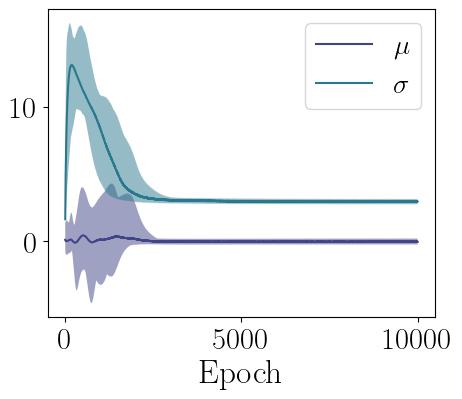

In [408]:
plot_parameter_analysis_nig("normal", results=results_longer_normal, figsize=(5,4), legend=True, file_name="params_normal.png")